# 常规六参数复杂绘图

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#观察绘图数据" data-toc-modified-id="观察绘图数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>观察绘图数据</a></span></li></ul></div>

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#-------设置支持中文----------------------#
import matplotlib as mpl
mpl.rcParams['font.family'] = ['PingFang HK']   #设置简黑字体
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['xtick.direction'] = 'in'

In [5]:
def prepare():
    def handle_unnormal(s):
        '''处理时间'''
        if s == '—':
            return np.nan
        elif '(' in s:
            return float(re.sub('\(.*\)', '', s))
        else:
            return float(s)
    '''
    确认输出的数据集含有时间，PM，气象数据
    '''
    file_path = r'../data/station_pollution.xls'
    data = pd.read_excel(file_path)
    grouped = data.groupby(['区域', '站点'])
    df = grouped.get_group(('东莞市', '中堂')).copy()
    df[df.columns[3:]] = df[df.columns[3:]].apply(lambda s: s.apply(handle_unnormal))
    df['时间'] = df['时间'].apply(lambda s: pd.datetime(*[int(item) for item in re.findall('\d+', s)]))
    return df

def plot_bar(axes, visable_series, ylabel='能见度'):
    x = np.arange(len(visable_series))
    axes.bar(x, visable_series, color='black')
    axes.set_ylabel(ylabel)
def plot_twins(axes, l_series, r_series, l_label='相对湿度(%)', r_label='温度(℃)'):
    axes.plot(l_series.values, c='blue')
    axes.set_ylabel(l_label, color='blue')
    axes.spines['left'].set_color('blue')
    axes.spines['right'].set_color('none')
    yticks = [int(item) for item in  axes.get_yticks()]
    axes.set_yticklabels(yticks, color='blue')
    ax = axes.twinx()
    ax.plot(r_series.values, c='green')
    ax.set_ylabel(r_label, color='green')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('green')
    yticks = [int(item) for item in  ax.get_yticks()]
    ax.set_yticklabels(yticks, color='green')
def plot_PM(axes, series10, series25):
    axes.plot(series25.values, label=r'PM2.5', c='red')
    axes.plot(series10.values, label=r'PM10', c='black')
    axes.set_ylabel('PM($\mu g/m^3$)')
    axes.legend()
    
def plot_arrow(axes, series_ws, series_wd, ylim, arg=20):
    lim = arg/2 + ylim
    axes.set_ylim(top=lim)
    theta = (series_wd-180)/180*np.pi   
    ws = series_ws / np.nanmax(series_ws) * arg
    x = np.arange(len(ws))
    y = np.array([ylim] * len(ws))
    u = ws * np.sin(theta)
    v = ws * np.cos(theta)
    axes.quiver(x, y, u, v, angles='xy', width=.0021, scale_units='xy', scale=1)

def main(col_time='时间', col_vis='能见度', col_ws='风速', col_wd='风向', col_t='气温', 
        col_h='湿度', col_pm10='PM10', col_pm25='PM2.5'):
    '''
    参数是数据框中列名， 依据实际需求来修改
    '''
    df = prepare()
    fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12, 8))
    plt.xlabel(df[col_time].iat[0].strftime('%Y/%m'))
    plot_bar(axes[0], df[col_vis])
    plot_arrow(axes[0], df[col_ws], df[col_wd], np.nanmax(df[col_vis]) + 20)

    plot_twins(axes[1], df[col_h], df[col_t])
    plot_PM(axes[2], df[col_pm25], df[col_pm10])
    #----设置x轴标签
    # xticks = df[col_time].iloc[axes[-1].get_xticks()[1:-1]].map(lambda s: s.strftime('%Y/%m/%d %H:%M'))
    xticks = df[col_time].iloc[axes[-1].get_xticks()[1:-1]].map(lambda s: s.strftime('%d %H:%M'))
    plt.xticks(axes[-1].get_xticks()[1:-1], xticks)

    plt.xlim(left=-.5, right=len(df[col_time]))
    plt.subplots_adjust(hspace=0)
    plt.show()  # 自己选择存储否？

## 观察绘图数据

In [3]:
df = prepare()
df.iloc[:, 2:]

时间      气压    气温    湿度     风向   风速   能见度   SO2   NO2  \
13   2019-07-16 00:00:00  1002.5  29.5  72.0  176.3  1.9  21.0  52.0  31.0   
49   2019-07-16 01:00:00  1002.6  29.2  75.0  193.0  1.8  19.8  44.0  35.0   
85   2019-07-16 02:00:00  1002.6  29.0  75.0  189.8  1.4  19.6  33.0  29.0   
121  2019-07-16 03:00:00  1002.2  28.8  77.0  189.3  1.2  18.5  38.0  28.0   
157  2019-07-16 04:00:00  1001.9  28.4  79.0  186.3  0.4  17.2  31.0  38.0   
193  2019-07-16 05:00:00  1002.0  28.3  80.0  188.2  0.7  14.1  34.0  43.0   
229  2019-07-16 06:00:00  1002.0  28.2  80.0  138.0  0.8  13.8  27.0  45.0   
265  2019-07-16 07:00:00  1002.2  28.2  80.0  134.3  1.0  13.2  14.0  40.0   
301  2019-07-16 08:00:00  1002.6  29.4  73.0  130.9  1.0  18.1  14.0  31.0   
337  2019-07-16 09:00:00  1002.9  30.8  64.0  118.1  1.1  21.4  24.0  21.0   
373  2019-07-16 10:00:00  1002.8  31.8  59.0   81.5  1.1  22.6  20.0  21.0   
409  2019-07-16 11:00:00  1002.8  32.4  56.0  169.3  1.0  20.5  27.0  26.0   
445  2019-07-16 12:00:00  1002.4  33.4  52.0  256.1  0.9  18.6  22.0  31.0   
481  2019-07-16 13:00:00  1001.6  34.6  48.0  276.1  0.8  17.5  15.0  26.0   
517  2019-07-16 14:00:00  1001.1  35.0  46.0  183.9  1.1  18.0  13.0  25.0   
553  2019-07-16 15:00:00  1000.3  35.4  45.0  204.7  1.2  22.4  15.0  29.0   
589  2019-07-16 16:00:00   999.4  35.3  44.0  162.0  1.6  26.6  24.0  24.0   
625  2019-07-16 17:00:00   999.2  36.0  43.0  212.6  1.1  27.8  17.0  27.0   
661  2019-07-16 18:00:00   999.4  35.5  45.0  199.0  1.0  25.8  14.0  23.0   
697  2019-07-16 19:00:00   999.5  34.9  47.0  232.8  0.5  24.7  19.0  27.0   
733  2019-07-16 20:00:00   999.7  33.9  52.0  203.1  1.1  19.9  27.0  40.0   
769  2019-07-16 21:00:00   999.8  32.6  58.0  241.1  0.9  15.9  36.0  84.0   
805  2019-07-16 22:00:00   999.9  31.8  60.0  206.3  1.2  18.5  35.0  83.0   
841  2019-07-16 23:00:00  1000.5  31.2  65.0  197.6  1.5  16.3  41.0  82.0   
877  2019-07-17 00:00:00  1000.5  30.6  69.0  203.5  1.2  18.0  44.0  70.0   
913  2019-07-17 01:00:00  1000.3  30.3  70.0  198.6  1.1  17.6  36.0  65.0   
949  2019-07-17 02:00:00   999.9  30.0  72.0  189.8  1.3  14.2  50.0  64.0   
985  2019-07-17 03:00:00   999.7  29.9  73.0  202.2  0.9  14.4  39.0  61.0   
1021 2019-07-17 04:00:00   999.2  29.4  76.0  234.4  0.9  13.5  26.0  57.0   
1057 2019-07-17 05:00:00   999.1  29.3  78.0  207.5  0.6  10.8  28.0  56.0   
...                  ...     ...   ...   ...    ...  ...   ...   ...   ...   
4153 2019-07-20 19:00:00  1001.9  27.6  79.0  215.7  0.9  19.1  21.0  62.0   
4189 2019-07-20 20:00:00  1002.4  27.7  78.0  216.3  0.8  15.5  32.0  68.0   
4225 2019-07-20 21:00:00  1002.6  27.7  77.0  160.5  1.0  14.0  28.0  69.0   
4261 2019-07-20 22:00:00  1002.6  27.8  76.0  176.4  1.0  14.8  33.0  74.0   
4297 2019-07-20 23:00:00  1002.8  27.7  77.0  174.6  0.3  13.2  28.0  73.0   
4333 2019-07-21 00:00:00  1003.1  27.7  78.0  177.1  1.1  16.0  28.0  69.0   
4369 2019-07-21 01:00:00  1003.2  27.6  79.0  215.9  0.7  14.4  29.0  59.0   
4405 2019-07-21 02:00:00  1002.5  27.6  78.0  215.5  0.8  15.1  22.0  59.0   
4441 2019-07-21 03:00:00  1001.9  27.3  81.0  143.2  1.4  11.1  20.0  55.0   
4477 2019-07-21 04:00:00  1002.1  27.4  81.0  138.4  0.8  15.1  13.0  55.0   
4513 2019-07-21 05:00:00  1002.2  27.5  80.0  149.4  1.2  13.1  10.0  51.0   
4549 2019-07-21 06:00:00  1002.3  27.8  79.0  165.2  0.8  17.4  11.0  49.0   
4585 2019-07-21 07:00:00  1002.8  27.9  79.0  149.7  0.5  17.2  20.0  46.0   
4621 2019-07-21 08:00:00  1003.4  28.3  79.0  155.7  0.6  13.8  17.0  47.0   
4657 2019-07-21 09:00:00  1004.1  29.0  76.0  189.1  1.7  18.0  24.0  38.0   
4693 2019-07-21 10:00:00  1004.2  30.2  71.0  212.9  1.6  25.7  14.0  31.0   
4729 2019-07-21 11:00:00  1004.0  30.0  72.0  304.9  1.2  24.5  10.0  47.0   
4765 2019-07-21 12:00:00  1003.7  28.8  81.0   29.2  1.5   8.4  11.0  63.0   
4801 2019-07-21 13:00:00  1003.2  28.5  82.0   87.6  1.9   7.6  14.0  59.0   
4837 2019-07-21 14:00:00  1002.9  29.4  72.0

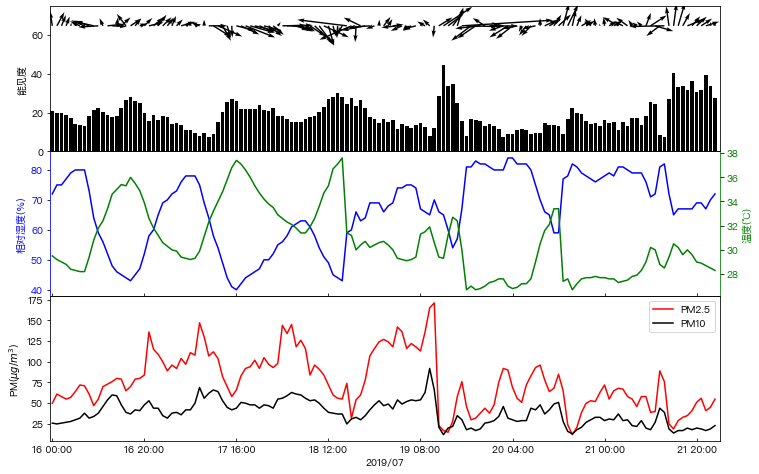

In [6]:
#------------调用函数-------------#
main()